# Project Work: Status Update 2

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from seaborn import regplot
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Simple Linear Regressor

In [3]:
print(df.columns.tolist())

['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [4]:
# Split into target and features
y = df[" loan_amount"]
X = df.drop(" loan_amount",axis=1)

X.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
# Separate categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns
number_cols = X.select_dtypes(include="number").columns

# Standardize number columns by hand
X_number = (X[number_cols] - X[number_cols].mean()) / X[number_cols].std(ddof=0)

# one hot encoding
X_categorical = pd.get_dummies(X[categorical_cols], dtype=int)

X = pd.concat([X_number, X_categorical], axis=1)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.head()

,loan_id,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,loan_status_ Approved,loan_status_ Rejected
2488,0.287255,-0.294102,-0.840590,1.243677,-0.307035,-0.380234,-0.745856,-0.651050,-1.008274,1,0,0,1,0,1
3703,1.273173,-0.883825,1.190402,-0.508091,-1.287256,1.711148,-0.905366,1.183573,1.884208,0,1,0,1,0,1
3347,0.984295,-0.294102,1.653610,-0.858444,0.006171,-1.102992,-0.426837,0.952872,2.099605,0,1,1,0,1,0
3487,1.097899,1.475067,0.620299,0.192617,0.522382,1.588126,1.555638,1.084701,1.330328,0,1,1,0,1,0
3957,1.479283,-1.473548,-0.270487,-1.208798,-1.310456,-0.057300,0.530220,-0.640064,-0.085141,0,1,1,0,0,1


In [6]:
# create simple linear regressor
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [7]:
# Predict on Test Set
yh_test = lr.predict(X_test)
yh_test = pd.DataFrame(yh_test, columns=['predict on X_test'])
yh_test.head()

,predict on X_test
0,2.533677e+07
1,2.220247e+07
2,2.400996e+07
3,2.602707e+07
4,2.132753e+07


In [8]:
# Compare with Test Set
print(y_test.head())

1972    17700000
528     23900000
3540    15800000
87      28300000
1621    15600000
Name:  loan_amount, dtype: int64


In [9]:
# MSE, MAE, and R_squared

# Calculate errors
errors = y_test - yh_test

# MSE
MSE = np.mean(errors ** 2)

# MAE
MAE = np.mean(np.abs(errors))

# printing weird because they're floats
print(f"MSE: {MSE:.4f}")
print(f"MAE: {MAE:.4f}")

# R squared
lr_score = lr.score(X_test, y_test)
print("R_squared = ", round(lr_score,4))

MSE: nan
MAE: nan
R_squared =  0.86


In [10]:
feature_names = X_train.columns
coefficients = lr.coef_

# Combine into a DataFrame for a clean display
weights_df = pd.DataFrame({
    "Feature": feature_names,
    "Weight": coefficients
}).sort_values(by="Weight", key=abs, ascending=False)  # Sort by absolute weight

print(weights_df)

                      Feature        Weight
2                income_annum  8.500307e+06
14      loan_status_ Rejected -5.661514e+05
13      loan_status_ Approved  5.661514e+05
4                 cibil_score -3.655493e+05
8            bank_asset_value -1.769022e+05
6     commercial_assets_value  1.610155e+05
0                     loan_id -8.407973e+04
1            no_of_dependents -7.744129e+04
7         luxury_assets_value -3.859222e+04
9         education_ Graduate  3.217713e+04
10    education_ Not Graduate -3.217713e+04
3                   loan_term  1.596017e+04
5    residential_assets_value  6.849483e+03
11          self_employed_ No  4.776993e+03
12         self_employed_ Yes -4.776993e+03


## Elastic Net Regressor

In [26]:
# test over range of alpha values
alpha_values = np.logspace(-4, 2, 50)  # from 1e-4 to 1e2

train_scores = []
test_scores = []

# fixed l1_ratio
l1_ratio = 0.5

for alpha in alpha_values:
    en = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=10000)
    en.fit(X_train, y_train)
    
    y_train_pred = en.predict(X_train)
    y_test_pred = en.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+16, tolerance: 2.798e+13
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+16, tolerance: 2.798e+13
  model = cd_fast.enet_coordinate_descent(
/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.917e+16, to

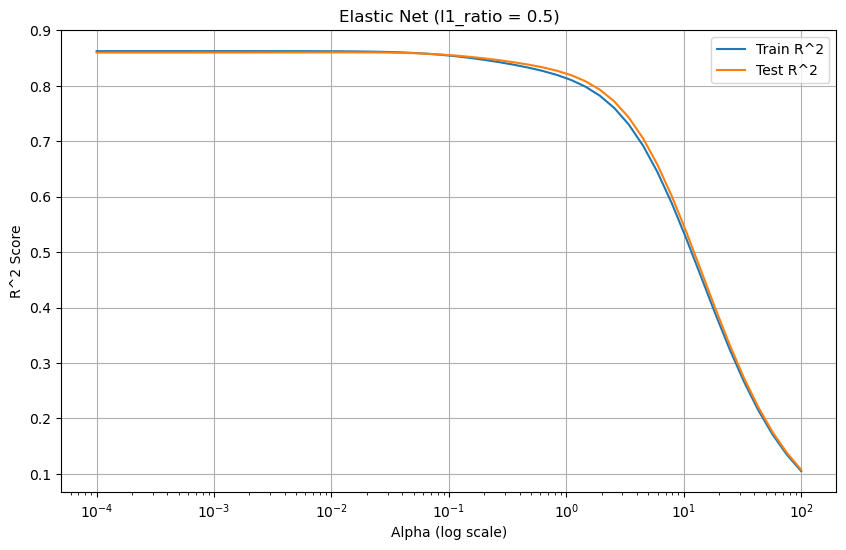

In [27]:
# plotting
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_scores, label="Train R^2")
plt.plot(alpha_values, test_scores, label="Test R^2")
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R^2 Score")
plt.title(f"Elastic Net (l1_ratio = {l1_ratio})")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# OPtimize alpha
best_index = np.argmax(test_scores)
best_alpha = alpha_values[best_index]
best_r2 = test_scores[best_index]

print(f"Best alpha: {best_alpha:.3f}")
print(f"Best Test R^2: {best_r2:.4f}")


Best alpha: 0.012
Best Test R^2: 0.8604


In [29]:
# Set alpha=0.012 based on plot, now vary l1 value
alpha = 0.012
l1_ratios = np.linspace(0, 1, 50)  # Ridge=0 to Lasso=1

train_scores = []
test_scores = []

for l1 in l1_ratios:
    en = ElasticNet(alpha=alpha, l1_ratio=l1, max_iter=10000)
    en.fit(X_train, y_train)
    
    y_train_pred = en.predict(X_train)
    y_test_pred = en.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_r2)
    test_scores.append(test_r2)

/opt/miniforge3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.054e+16, tolerance: 2.798e+13 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


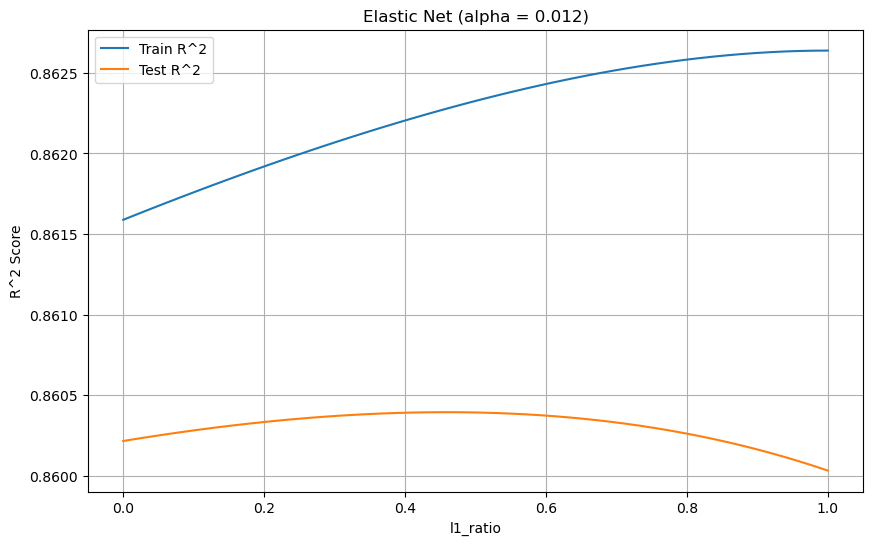

In [30]:
# plotting
plt.figure(figsize=(10, 6))
plt.plot(l1_ratios, train_scores, label="Train R^2")
plt.plot(l1_ratios, test_scores, label="Test R^2")
plt.xlabel("l1_ratio")
plt.ylabel("R^2 Score")
plt.title(f"Elastic Net (alpha = {alpha})")
plt.legend()
plt.grid(True)
plt.show()

In [31]:
# OPtimize l1
best_index = np.argmax(test_scores)
best_l1 = l1_ratios[best_index]
best_r2 = test_scores[best_index]

print(f"Best l1_ratio: {best_l1:.3f}")
print(f"Best Test R^2: {best_r2:.4f}")


Best l1_ratio: 0.449
Best Test R^2: 0.8604


In [32]:
# Results of feature selection

# Fit model at best l1_ratio (and alpha)
en_best = ElasticNet(alpha=alpha, l1_ratio=best_l1, max_iter=10000)
en_best.fit(X_train, y_train)

# Get coefficients
coefs = en_best.coef_

# If you have feature names:
selected_features = np.array(feature_names)[coefs != 0]
zeroed_features = np.array(feature_names)[coefs == 0]

print("Selected (non-zero) features:")
print(selected_features)

print("\nZeroed-out features:")
print(zeroed_features)

Selected (non-zero) features:
['loan_id' ' no_of_dependents' ' income_annum' ' loan_term' ' cibil_score'
 ' residential_assets_value' ' commercial_assets_value'
 ' luxury_assets_value' ' bank_asset_value' ' education_ Graduate'
 ' education_ Not Graduate' ' self_employed_ No' ' self_employed_ Yes'
 ' loan_status_ Approved' ' loan_status_ Rejected']

Zeroed-out features:
[]


## Feature Engineering

In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Load data 
df = pd.read_csv("loan_approval_dataset.csv")

# features and target
y = df[" loan_amount"]
X = df.drop(" loan_amount", axis=1)

# Train/test split FIRST
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

# 1. Identify column types
categorical_cols = X.select_dtypes(include="object").columns
number_cols = X.select_dtypes(include="number").columns

# 2. Process TRAINING DATA
# Standardize numeric columns (fit only on training data)
X_train_num = (X_train_raw[number_cols] - X_train_raw[number_cols].mean()) / X_train_raw[number_cols].std(ddof=0)

# One-hot encode categoricals (fit only on training data)
X_train_cat = pd.get_dummies(X_train_raw[categorical_cols], dtype=int)

# Combine
X_train_processed = pd.concat([X_train_num, X_train_cat], axis=1)

# 3. Process TEST DATA
# Standardize using training data mean and std
X_test_num = (X_test_raw[number_cols] - X_train_raw[number_cols].mean()) / X_train_raw[number_cols].std(ddof=0)

# One-hot encode using training data columns
X_test_cat = pd.get_dummies(X_test_raw[categorical_cols], dtype=int)
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)  # align with train

# Combine
X_test_processed = pd.concat([X_test_num, X_test_cat], axis=1)

# 4. Feature Engineering (PolynomialFeatures)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit on training
X_poly_train = poly.fit_transform(X_train_processed)
feature_names = poly.get_feature_names_out(X_train_processed.columns)
Xe_train = pd.DataFrame(X_poly_train, columns=feature_names)

# Transform test
X_poly_test = poly.transform(X_test_processed)
Xe_test = pd.DataFrame(X_poly_test, columns=feature_names)

# Make sure indices match target
Xe_train.index = y_train.index
Xe_test.index = y_test.index

Xe_train.head()

,loan_id,no_of_dependents,income_annum,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Graduate,...,self_employed_ No^2,self_employed_ No self_employed_ Yes,self_employed_ No loan_status_ Approved,self_employed_ No loan_status_ Rejected,self_employed_ Yes^2,self_employed_ Yes loan_status_ Approved,self_employed_ Yes loan_status_ Rejected,loan_status_ Approved^2,loan_status_ Approved loan_status_ Rejected,loan_status_ Rejected^2
2488,0.284887,-0.299805,-0.838252,1.236846,-0.313297,-0.386771,-0.753262,-0.646038,-1.011865,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3703,1.273252,-0.890253,1.197861,-0.508105,-1.292451,1.720622,-0.913577,1.200004,1.881560,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3347,0.983657,-0.299805,1.662237,-0.857095,-0.000431,-1.115061,-0.432632,0.967867,2.097028,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3487,1.097543,1.471536,0.626320,0.189875,0.515218,1.596657,1.559853,1.100517,1.327500,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3957,1.479874,-1.480700,-0.266712,-1.206085,-1.315626,-0.061365,0.529257,-0.634984,-0.088432,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
from sklearn.model_selection import cross_validate

# Select Feature function
def SelectFeature(model, candidates, X, y):
    best_feature = None
    best_score = -np.inf  # start with lowest possible R^2
    lr = LinearRegression(fit_intercept=False)

    for feature in candidates:
        trial_model = model + [feature]  # try adding one candidate
        cv_results = cross_validate(lr, X[trial_model], y, cv=5, n_jobs=-1)
        mean_r2 = cv_results['test_score'].mean()

        if mean_r2 > best_score:
            best_score = mean_r2
            best_feature = feature

    return best_feature, best_score

In [14]:
# From notes: forward feature selection (this will take a while)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

# Make sure bias column exists
if "bias" not in Xe_train.columns:
    Xe_train["bias"] = 1
    Xe_test["bias"] = 1

# Initialization
model = ['bias']
candidates = list(Xe_train.columns)
candidates.remove('bias')  # remove bias so it's not re-added
R2_scores = []

# Initial model with only bias
lr = LinearRegression(fit_intercept=False)
cv_results = cross_validate(lr, Xe_train[model], y_train, cv=5)
R2_scores.append(cv_results['test_score'].mean())

# Forward selection loop
while len(candidates) > 0:
    next_feature, best_r2 = SelectFeature(model, candidates, Xe_train, y_train)
    
    print(f"Feature added: {next_feature}")
    print(f"Model R^2: {best_r2:.4f}")

    model.append(next_feature)
    candidates.remove(next_feature)
    R2_scores.append(best_r2)

print("Forward Feature Selection Complete!")

Feature added:  income_annum
Model R^2: 0.8604
Feature added:  cibil_score  loan_status_ Rejected
Model R^2: 0.8613
Feature added:  cibil_score  loan_status_ Approved
Model R^2: 0.8623
Feature added:  cibil_score^2
Model R^2: 0.8632
Feature added:  loan_term  loan_status_ Rejected
Model R^2: 0.8638
Feature added:  loan_term^2
Model R^2: 0.8645
Feature added:  residential_assets_value  commercial_assets_value
Model R^2: 0.8648
Feature added:  residential_assets_value  education_ Not Graduate
Model R^2: 0.8651
Feature added:  commercial_assets_value  bank_asset_value
Model R^2: 0.8655
Feature added:  bank_asset_value  loan_status_ Rejected
Model R^2: 0.8657
Feature added: loan_id  luxury_assets_value
Model R^2: 0.8660
Feature added:  loan_term  education_ Not Graduate
Model R^2: 0.8661
Feature added: loan_id  self_employed_ Yes
Model R^2: 0.8661
Feature added:  no_of_dependents  education_ Not Graduate
Model R^2: 0.8662
Feature added:  commercial_assets_value  education_ Not Graduate
Mod

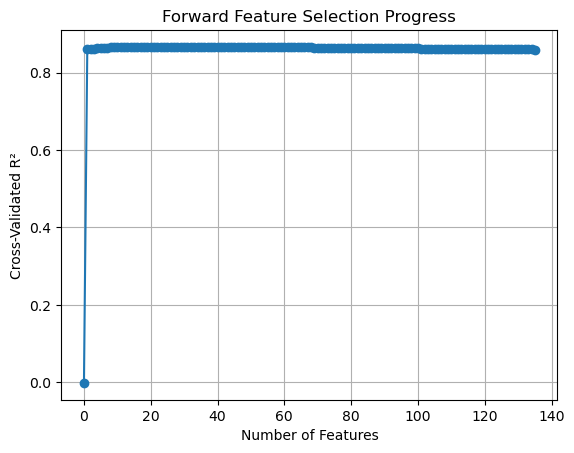

In [15]:
import matplotlib.pyplot as plt

plt.plot(R2_scores, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validated R²")
plt.title("Forward Feature Selection Progress")
plt.grid(True)
plt.show()
